<a href="https://colab.research.google.com/github/niikun/streamlit_play/blob/main/ocr_gpt4o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install openai

In [10]:
import os
import base64
from PIL import Image
from google.colab import userdata
from openai import OpenAI

In [11]:
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

In [12]:
!wget -O example.png https://pbs.twimg.com/media/GO-l8WCbwAA7d7m?format=jpg&name=large


--2024-06-10 14:35:18--  https://pbs.twimg.com/media/GO-l8WCbwAA7d7m?format=jpg
Resolving pbs.twimg.com (pbs.twimg.com)... 72.21.91.70, 2a04:4e42:7a::159
Connecting to pbs.twimg.com (pbs.twimg.com)|72.21.91.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 136620 (133K) [image/jpeg]
Saving to: ‘example.png’

example.png         100%[===================>] 133.42K  --.-KB/s    in 0.04s   

2024-06-10 14:35:18 (3.05 MB/s) - ‘example.png’ saved [136620/136620]



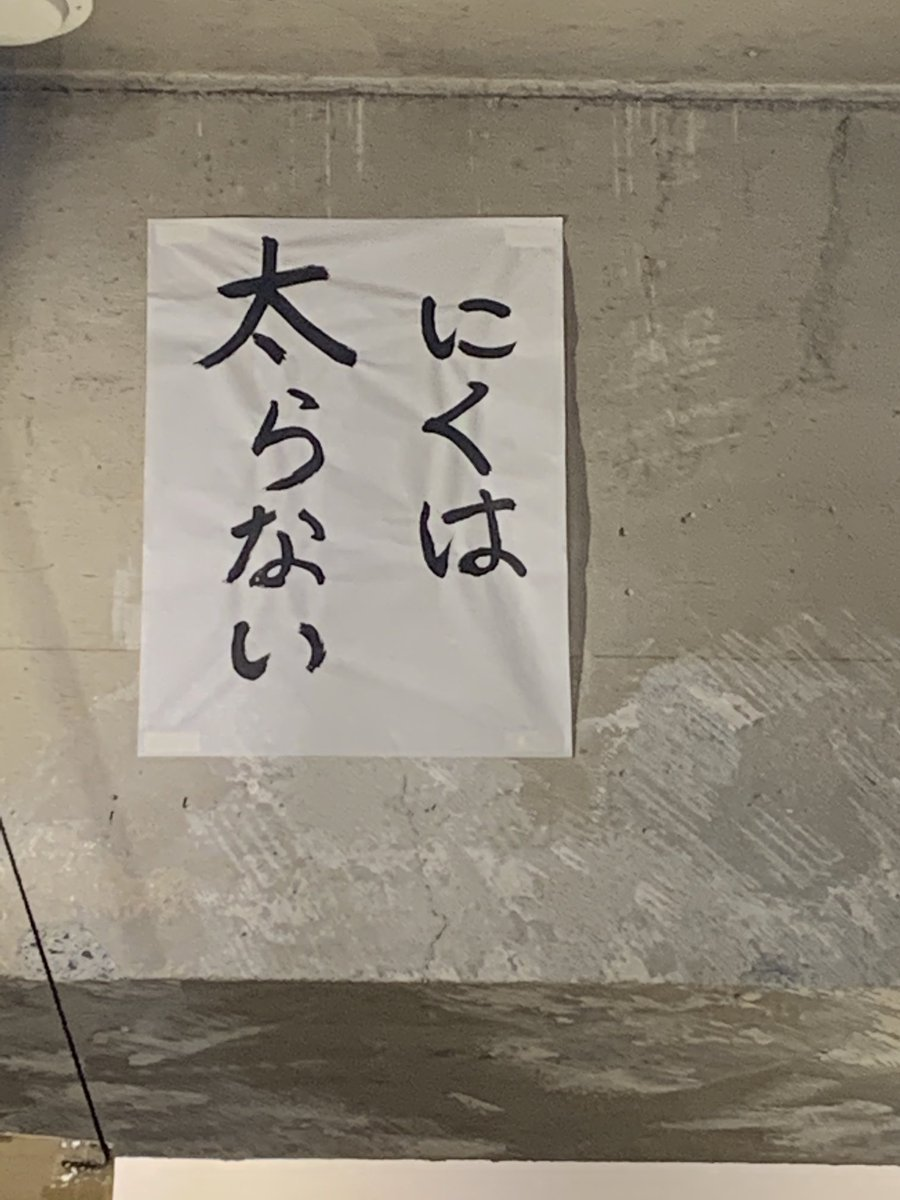

In [13]:
img = Image.open("example.png")
img

In [16]:
client = OpenAI()

completion = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "system", "content": "You are an excellent secretary who responds in Japanese."},
        {"role": "user",
         "content": [
             {"type": "text", "text": """\
## 命令
この画像に表示されている文字を教えて下さい。
書かれている文字以外は応答しないでください。

## Output
"""},
             {
                 "type": "image_url",
                 "image_url": {
                     "url": f"data:image/png;base64,{encoded_image}"
                 },
             },
         ],
         }
    ]
)

image_path="/content/example.png"

with open(image_path, "rb") as image_file:
    encoded_image = base64.b64encode(image_file.read()).decode("utf-8")

print(completion.choices[0].message.content)

にくは
太らない


In [17]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.1 MB/s eta 0:00:00


In [ ]:
st